In [1]:
#
# Hot Topics in Machine Learning, University of Mannheim, 2017
# Author: Rainer Gemulla
# Assignment 4

In [30]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn import svm
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error

In [4]:
%matplotlib notebook

In [5]:
inNotebook = True  # change this to True if you use a notebook
def nextplot():
    if inNotebook:
        plt.figure()  # this creates a new plot
    else:
        plt.clf()     # and this clears the current one

In [6]:
# create the datasets
%run -i "a04-helper.py"

# 1 Perceptrons

<IPython.core.display.Javascript object>


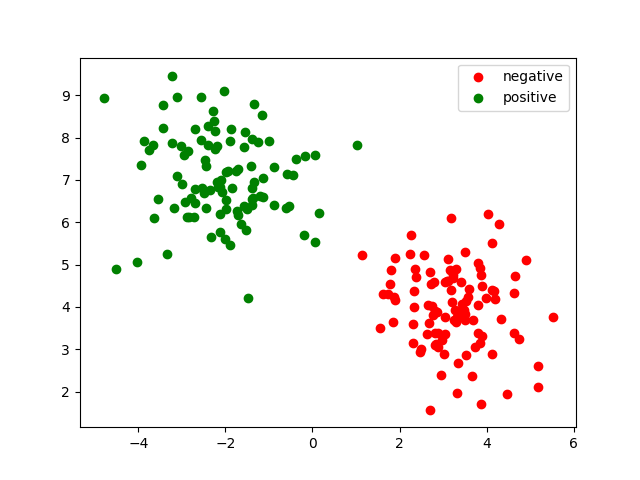

In [7]:
# plot X1 (separable)
nextplot()
plot3(X1, y1)

<IPython.core.display.Javascript object>


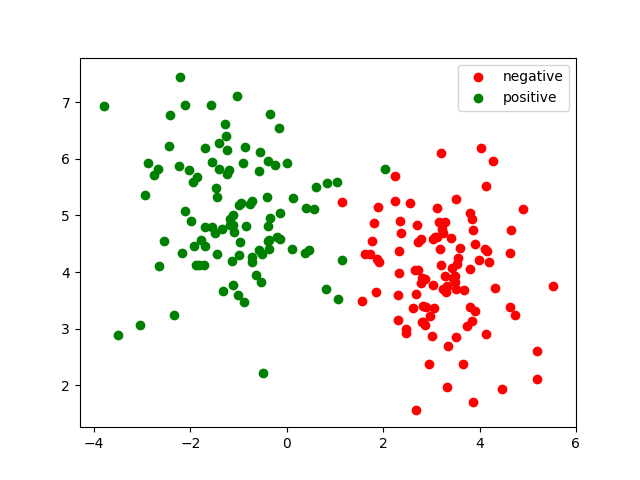

In [8]:
# plot X2 (not separable)
nextplot()
plot3(X2, y2)

In [9]:
def pt_classify(X, w):
    """Classify using a perceptron.

    Parameters
    ----------
    X : ndarray of shape (N,D) or shape (D,)
        Design matrix of test examples
    w : ndarray of shape (D,)
        Weight vector

    Returns
    -------
    ndarray of shape (N,)
        Predicted binary labels (either 0 or 1)"""
    if len(X.shape) == 1:
        X = X.reshape((1, X.shape[0]))
    return (X@w >= 0).astype(np.int)

## 1a+c Learning

In [58]:
def pt_train(X, y, maxepochs=100, pocket=False, w0=None):
    """Train a perceptron.

    Parameters
    ----------
    X : ndarray of shape (N,D)
        Design matrix
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1)
    maxepochs : int
        Maximum number of passes through the training set before the algorithm
        returns
    pocket : bool
       Whether to use the pocket algorithm (True) or the perceptron learning algorithm
       (False)
    w0 : ndarray of shape (D,)
        Initial weight vector

    Returns
    -------
    ndarray of shape (D,)
        Fitted weight vector"""

    N, D = X.shape
    if w0 is None:        # initial weight vector
        w0 = np.zeros(D)
    w = w0                # current weight vector

    ## YOUR CODE HERE
    
    def sign(x,w):
            if np.dot(x,w) < 0:
                return 0
            else:
                return 1
            
    if pocket:
        w_r = w
        num_correct = 0
        ep = 0
        while ep <= maxepochs:
            num_tmp = 0
            z = random.randint(0, N-1)  # bias term is X[,0]?
            tmp = sign(X[z],w_r)
            if tmp != y[z]:
                w_r = w_r + (y[z] * 2 -1) * X[z] # Due to y[z] is 0 or 1, so y[z]*2-1 would be -1 or 1 
                y_hat = pt_classify(X,w_r)
                for i in range(N):
                    if y_hat[i] == 1:
                        num_tmp += 1
                if num_tmp > num_correct:
                    w = w_r
                    num_correct = num_tmp
            ep += 1
                        
    else:
        for j in range(maxepochs):
            flag = False
            for i in range(N):
                tmp = sign(X[i],w)
                if tmp != y[i]:
                    w = w + (y[i] * 2 -1) * X[i]
                    flag = True
            if flag is False:
                break
    return w
    
    

## 1b+d Experimentation

<IPython.core.display.Javascript object>


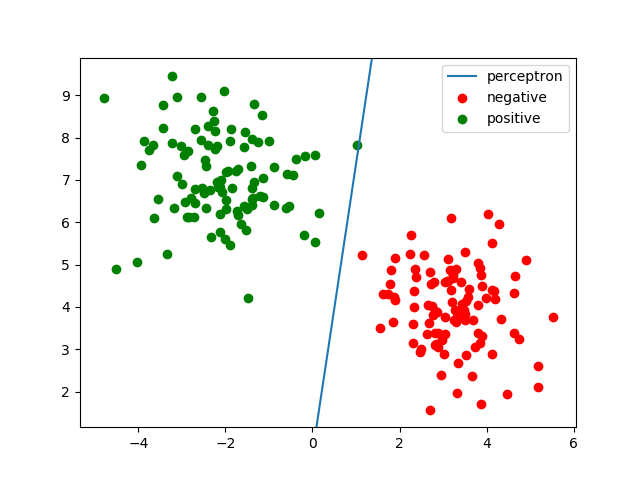

In [59]:
# Train a perceptron using the perceptron learning algorithm and plot decision
# boundary. You should get a perfect classification here. The decision boundary
# should not change if you run this multiple times.
w = pt_train(X1, y1)
nextplot()
plot3(X1,y1)
plot3db(w, label="perceptron")

<IPython.core.display.Javascript object>


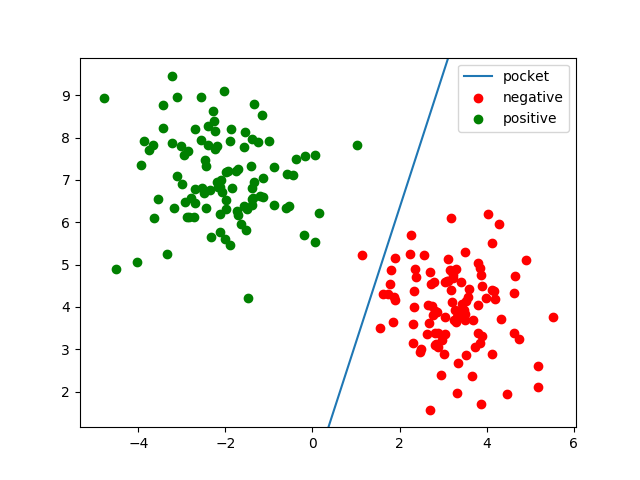

In [60]:
# Train a perceptron using the pocket algorithm and plot decision boundary. You
# should get a perfect classification here (with high probability). The decision
# boundary should change if you run this multiple times.
w = pt_train(X1, y1, pocket=True)
nextplot()
plot3(X1,y1)
plot3db(w, label="pocket")

<IPython.core.display.Javascript object>


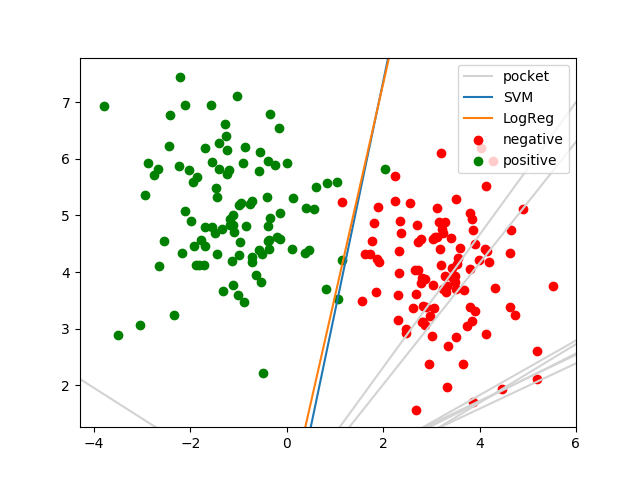


Misclassification rates (train)
Perceptron (best result): 58
Linear SVM (C=1)        : 3
Logistic regression     : 3


In [61]:
# Train 10 perceptrons starting with random weights. Also train logistic
# regression and SVM. Plot all decision boundaries, and print the
# misclassification rates (on training data). Try this with and without the
# pocket algorithm.
nextplot()
plot3dbs(X2, y2, n=10, maxepochs=1000, pocket=True)

# 2 Multi-Layer Feed-Forward Neural Networks

## 2a Conjecture how an FNN fit will look like

<IPython.core.display.Javascript object>


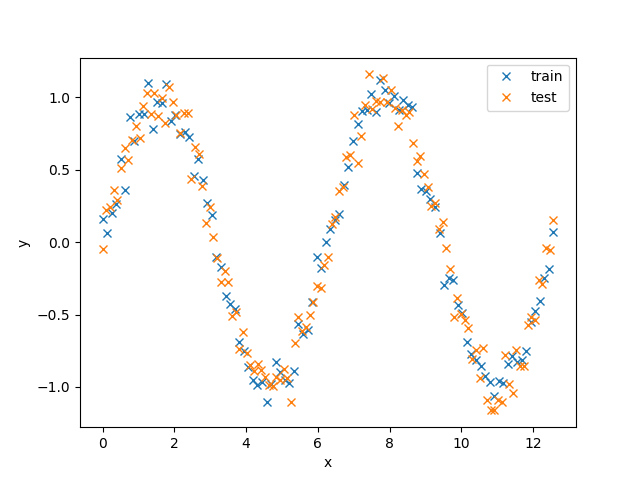

In [62]:
# here is the one-dimensional dataset that we will use
nextplot()
plot1(X3, y3, label="train")
plot1(X3test, y3test, label="test")
plt.legend()

## 2b Train with 2 hidden units

In [63]:
# Train an FNN using scikit-learn. nhidden is an integer, it refers to the
# number of units in the hidden layer.
def train3(nhidden, activation='logistic'):
    print("Training FNN with", nhidden, "hidden units...")
    if type(nhidden) is int:
        nhidden = (nhidden,)
    model = MLPRegressor(activation=activation,
                         hidden_layer_sizes=nhidden,
                         solver='lbfgs',  # better solver for small datasets
                         alpha=0,         # no regularization
                         max_iter=100000, tol=1e-10)
    model.fit(X3,y3.reshape((-1,)))
    return model

In [64]:
# Let's fit the model with 2 units in the hidden layer
model = train3(2)
print("Training error:", mean_squared_error(y3, model.predict(X3)))
print("Test error    :", mean_squared_error(y3test, model.predict(X3test)))

Training FNN with 2 hidden units...
Training error: 0.372923094278
Test error    : 0.3743231246


<IPython.core.display.Javascript object>


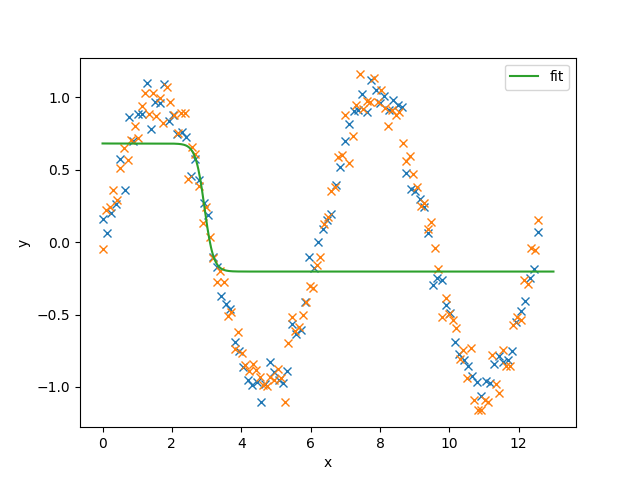

In [65]:
# plot the data and the fit
nextplot()
plot1(X3, y3, label="train")
plot1(X3test, y3test, label="test")
plot1fit(np.linspace(0, 13, 500)[:,np.newaxis], model)

In [66]:
# The weight matrices and bias vectors can be read out as follows. If you want,
# use these parameters to compute the output of the network (on X3) directly and
# compare to model.predict(X3)
weights = model.coefs_      # list of weight matrices (layer by layer)
biases = model.intercepts_  # list of bias vectors (layer by layer)

In [ ]:
# now repeat this multiple times
# YOUR CODE HERE

## 2c Improved training

In [ ]:
# Derive a meta-learning algorithm that trains multiple times and returns the
# best fit (on training data). Use train3 in your implementation and pass
# argument "activation" to it as is.
def train3improved(nhidden, repetitions=10, activation='logistic'):
    # YOUR CODE HERE

## 2d Width

In [ ]:
# From now on, only use your improved method. Experiment with different hidden
# layer sizes
# YOUR CODE HERE

## 2e Distributed representations

In [ ]:
# train a model to analyze
model = train3improved(2)

In [ ]:
# plot the fit as well as the outputs of each neuron in the hidden
# layer (scale for the latter is shown on right y-axis)
nextplot()
plot1(X3, y3, label="train")
plot1(X3test, y3test, label="test")
plot1fit(np.linspace(0, 13, 500)[:,np.newaxis], model, hidden=True, scale=False)

In [ ]:
# plot the fit as well as the outputs of each neuron in the hidden layer, scaled
# by its weight for the output neuron (scale for the latter is shown on right
# y-axis)
nextplot()
plot1(X3, y3, label="train")
plot1(X3test, y3test, label="test")
plot1fit(np.linspace(0, 13, 500)[:,np.newaxis], model, hidden=True, scale=True)

## 2f Depth (optional)

In [ ]:
# Experiment with different number of layers.
#
# The argument nhidden is a tuple with as many entries as there are hidden
# layers; each entry is the size of the layer. The example code below uses two
# hidden layers; the first hidden layer has 9 neurons, then second one has 10
# neurons.
#
# The argument activation specifies the type of neurons in the hidden layers.
# Try 'logistic', 'relu', and 'tanh'. For 'relu' units and 1 hidden layer, you
# can also plot the outputs of the hidden neurons (using the same code above).
model = train3improved((9,10,), 50, activation='relu')
nextplot()
plot1(X3, y3, label="train")
plot1(X3test, y3test, label="test")
plot1fit(np.linspace(0, 13, 500)[:,np.newaxis], model)
print("Training error:", mean_squared_error(y3, model.predict(X3)))
print("Test error    :", mean_squared_error(y3test, model.predict(X3test)))

## 2g Keras (optional)

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import backend

Using TensorFlow backend.


In [ ]:
# train an FNN with one hidden layer and nhidden units using Keras
def train3keras(nhidden_or_model, epochs=2000, lr=None, verbose=True):
    # we force computation on the CPU (much faster for such a small model)
    with tf.device("/cpu:0"):
        if type(nhidden_or_model) is int:
            # our FNN is a sequence of layers
            nhidden = nhidden_or_model
            model = Sequential()

            if nhidden > 0:
                # create the hidden layer (fully connected, logistic units).
                # Here we "help" the fitting method by provided a range of
                # useful (random) choice for the initial biases.
                model.add(Dense(nhidden, activation='sigmoid', input_dim=1,
                                bias_initializer=keras.initializers.RandomUniform(0,4*np.pi)))

                # create the output layer (fully connected, linear unit)
                model.add(Dense(1, activation='linear'))
            else:
                # create just the output layer (fully connected, linear unit)
                model.add(Dense(1, activation='linear', input_dim=1))

            # compile the model
            if lr is None:
                lr = 0.01
            model.compile(loss='mean_squared_error',                # optimize the mean squared error (MSE)
                          optimizer=keras.optimizers.Adam(lr=lr))   # use the Adam optimizer

            if verbose:
                print("Training FNN with {:d} hidden units for {:d} epochs...".format(nhidden, epochs))
        else:
            model = nhidden_or_model
            if lr is not None:
                backend.set_value(model.optimizer.lr, lr)
            if verbose:
                print("Continuing training for another {:d} epochs...".format(epochs))

        # train the model
        history = model.fit(X3, y3, epochs=epochs, verbose=0)

        # print errors
        mse_train = model.evaluate(X3,y3, verbose=0)
        if verbose:
            print("Training error:", mse_train)

        # return result
        return model, history

In [ ]:
# Let's fit the model with 2 units in the hidden layer
model, history = train3keras(2)

In [ ]:
# Plot the progress training made over time
nextplot()
plt.plot(history.history['loss'])
#plt.ylim([0,0.5])
plt.yscale("log")
plt.xlabel("Epoch")
plt.ylabel("Mean squared error")

In [ ]:
# If the model does not "look" converged, you may want to try more
# epochs. You can resume training as follows:
train3keras(model)

In [ ]:
# plot the data and the fit
nextplot()
plot1(X3, y3, label="train")
plot1(X3test, y3test, label="test")
plot1fit(np.linspace(0, 13, 500)[:,np.newaxis], model, hidden=True)